In [1]:
import pandas as pd
import dask.dataframe as dd

import imp

plot = imp.load_source('plot', '../src/plot.py')

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
features = [
    "CC_to_C_rate",
    "CD_to_C_rate",
    "DC_to_C_rate",
    "DD_to_C_rate",
    "SSE",
    "Cooperation_rating",
    "Cooperation_rating_max",
    "Cooperation_rating_min",
    "Cooperation_rating_median",
    "Cooperation_rating_mean",
    "Cooperation_rating_comp_to_max",
    "Cooperation_rating_comp_to_min",
    "Cooperation_rating_comp_to_median",
    "Cooperation_rating_comp_to_mean",
]

In [5]:
dfs = []
for name in ['standard', 'noise', 'probend', 'probend_noise']:
    df = pd.read_csv('../data/%s_3_processed.csv' % name, index_col=0
                           )
    df['type'] = name
    dfs.append(df)

In [6]:
types = ['standard', 'noise', 'probend', 'probend_noise']

**Standard Tournaments**

In [8]:
max(dfs[0]['turns']), max(dfs[0]['size']), max(dfs[0]['repetitions'])

(200.0, 195.0, 100.0)

In [12]:
a_type = types[0]
df = dfs[0]
    
xs = features.copy()
xs += ["memory_usage"]

In [13]:
xs.remove('Cooperation_rating')
xs.remove('Cooperation_rating_comp_to_median')
xs.remove('Cooperation_rating_comp_to_max')
xs.remove('Cooperation_rating_median')

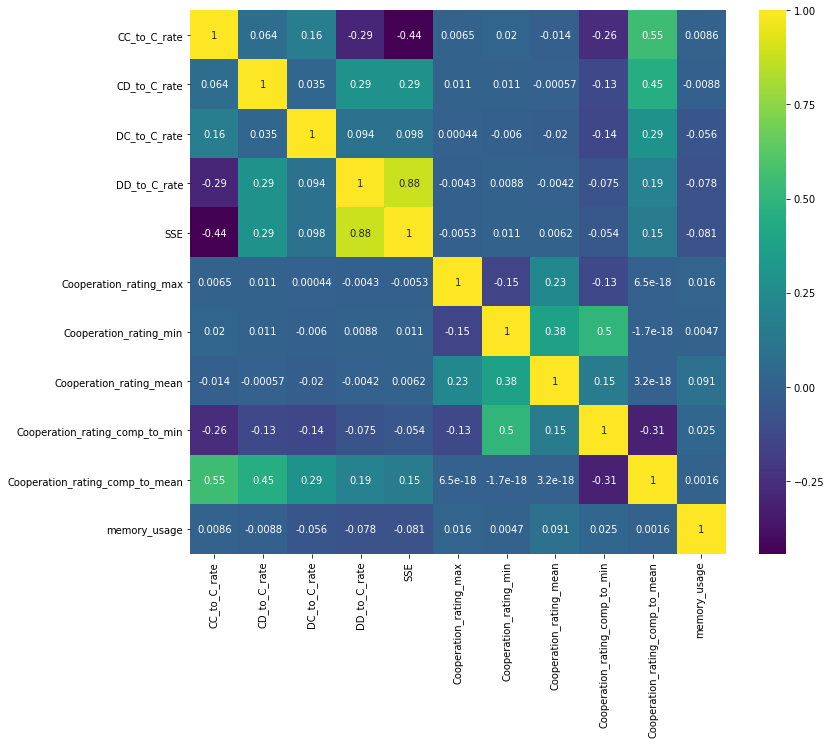

In [14]:
plt.figure(figsize=(12,10))

cor = df[xs].corr()

sns.heatmap(cor, annot=True, cmap="viridis");

In [16]:
X = df[xs].values
y = df['Normalized_Rank'].values

model = sm.OLS(y, X).fit()

print("============")
print(f"{a_type}")
print("============")
print(model.summary(xname=xs))

standard
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                          6.899e+05
Date:                Wed, 04 Mar 2020   Prob (F-statistic):                        0.00
Time:                        17:56:04   Log-Likelihood:                      2.0146e+05
No. Observations:             1005043   AIC:                                 -4.029e+05
Df Residuals:                 1005032   BIC:                                 -4.028e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------

For **standard types** the p-values are smaller than 0.05 thus, all variables have a significant effect. The variabls that affect the most due to higher coefficient values are $C_{max}$, $C_{mean}$, $C_r$ / $C_{mean}$ and $C_r$

**Noisy Tournaments**

In [18]:
index = 1
a_type = types[index]
df = dfs[index]
    
xs = features.copy()

In [19]:
xs.remove('Cooperation_rating')
xs.remove('Cooperation_rating_median')
xs.remove('Cooperation_rating_comp_to_median')
xs.remove('Cooperation_rating_max')

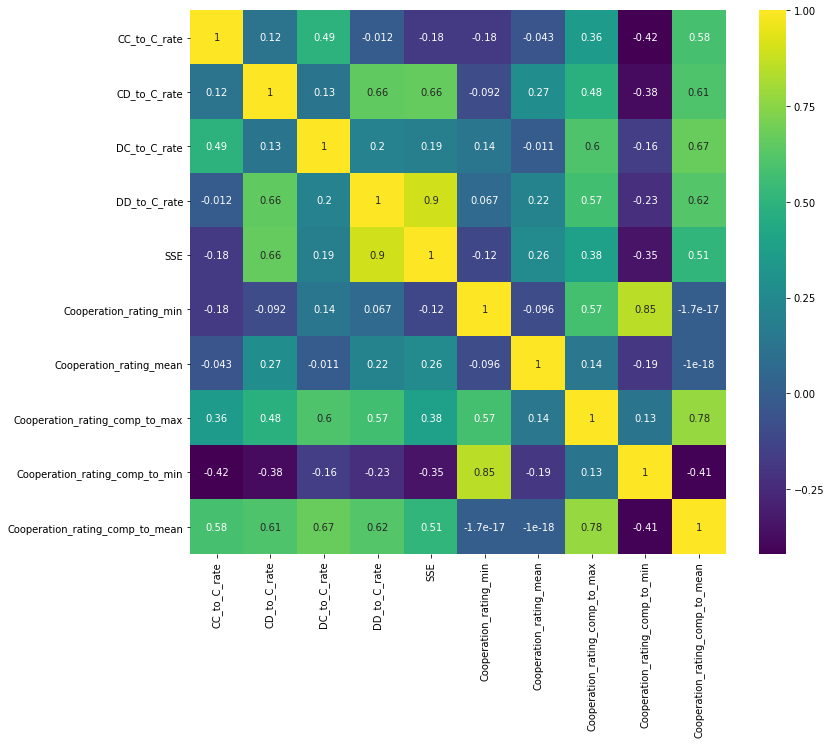

In [20]:
plt.figure(figsize=(12,10))

cor = df[xs].corr()

sns.heatmap(cor, annot=True, cmap="viridis");

In [22]:
a_type = types[index]
df = dfs[index]
    
xs = features.copy()
xs += ["noise", "memory_usage"]
        
X = df[xs].values
y = df['Normalized_Rank'].values

model = sm.OLS(y, X).fit()

print("============")
print(f"{a_type}")
print("============")
print(model.summary(xname=xs))

noise
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                          6.511e+05
Date:                Wed, 04 Mar 2020   Prob (F-statistic):                        0.00
Time:                        17:56:59   Log-Likelihood:                      3.4446e+05
No. Observations:             1005190   AIC:                                 -6.889e+05
Df Residuals:                 1005174   BIC:                                 -6.887e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------

For **noise types** all expect two feautures are important. The two which are not are _repetitions_ and _memory usage_. The rest of the features have a significant effect. The features with the highest coefficients, both negative and positive, are $C_r$, $C_{max}$, $C_{mean}$ and $C_r$ / $C_{max}$ and with -0.5 $C_r$ / $C_{mean}$

**Probabilistic Ending Tournaments**

In [23]:
index = 2
a_type = types[index]
df = dfs[index]
    
xs = features.copy()
xs += ["probend"]

In [24]:
xs.remove('Cooperation_rating')
xs.remove('Cooperation_rating_median')
xs.remove('Cooperation_rating_comp_to_median')
xs.remove('Cooperation_rating_comp_to_max')

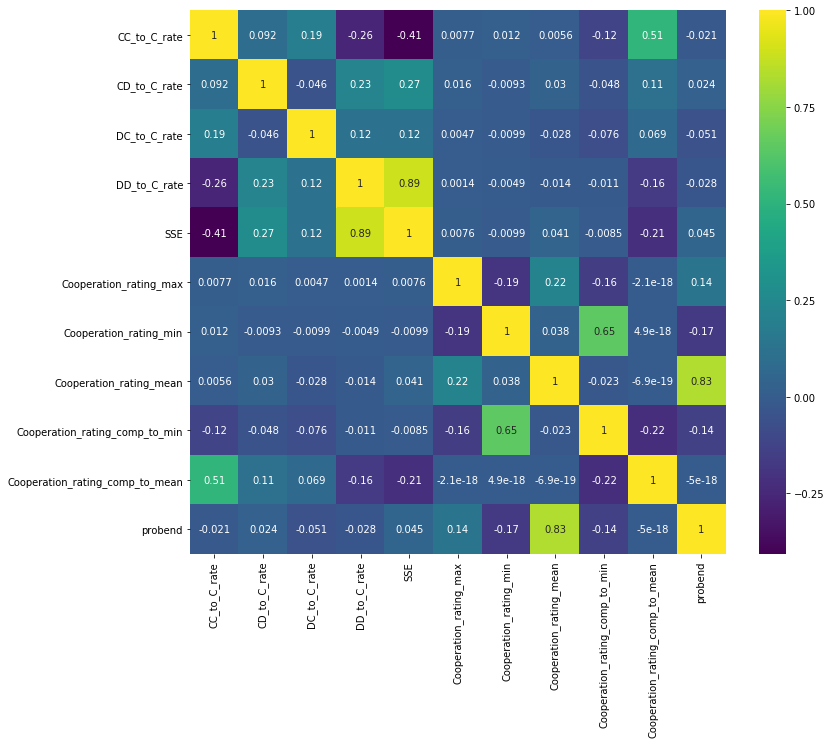

In [25]:
plt.figure(figsize=(12,10))

cor = df[xs].corr()

sns.heatmap(cor, annot=True, cmap="viridis");

In [26]:
X = df[xs].values
y = df['Normalized_Rank'].values

model = sm.OLS(y, X).fit()

print("============")
print(f"{a_type}")
print("============")
print(model.summary(xname=xs))

probend
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                          7.832e+05
Date:                Wed, 04 Mar 2020   Prob (F-statistic):                        0.00
Time:                        17:58:27   Log-Likelihood:                      2.5815e+05
No. Observations:             1005190   AIC:                                 -5.163e+05
Df Residuals:                 1005179   BIC:                                 -5.162e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------

For **probabilistic ending** tournmanents all but two feautures are significant. The non significant features are size and the probability of the match ending. Regarding the significant features, the once with the highest coefficients positive and negative are: $C_{max}$, $C_{mean}$, $C_r$ / $C_{mean}$, $C_r$ / $C_{max}$

**Noisy Probabilistic Ending Tournaments**

In [27]:
index = 3
a_type = types[index]
df = dfs[index]
    
xs = features.copy()
xs += ["probend", "noise"]

In [28]:
xs.remove('Cooperation_rating_median')
xs.remove('Cooperation_rating_max')

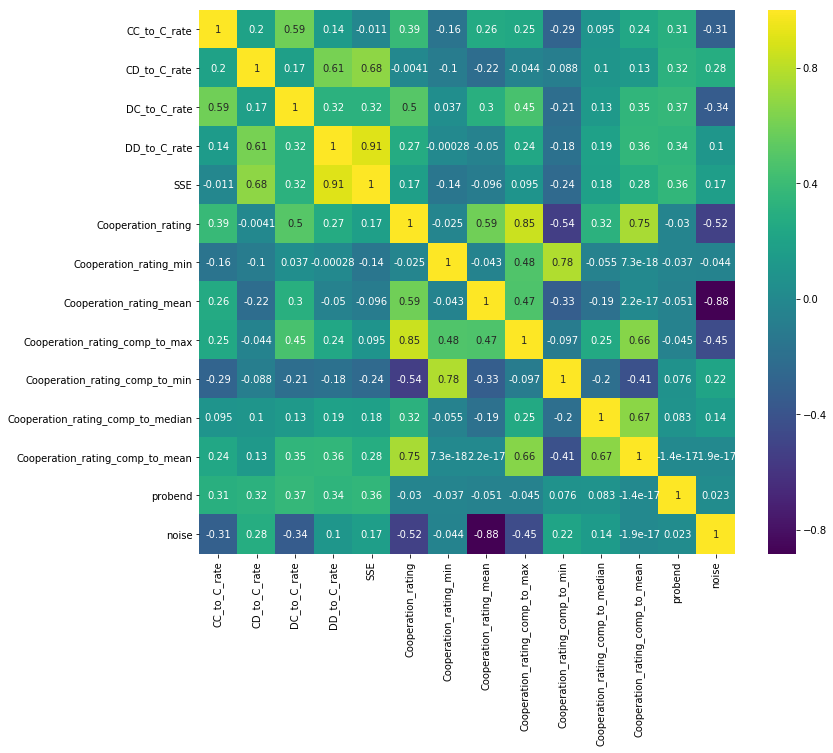

In [29]:
plt.figure(figsize=(12,10))

cor = df[xs].corr()

sns.heatmap(cor, annot=True, cmap="viridis");

In [30]:
X = df[xs].values
y = df['Normalized_Rank'].values

model = sm.OLS(y, X).fit()

print("============")
print(f"{a_type}")
print("============")
print(model.summary(xname=xs))

probend_noise
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          5.654e+05
Date:                Wed, 04 Mar 2020   Prob (F-statistic):                        0.00
Time:                        18:02:22   Log-Likelihood:                      2.2021e+05
No. Observations:             1005190   AIC:                                 -4.404e+05
Df Residuals:                 1005176   BIC:                                 -4.402e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
----

For **noisy probabilistic ending** tournaments all feautures are significant ($p$ value $< 0.5$).  The features with the highest effect on the normalised rank are $C_{max}$, $C_r$ / $C_{max}$, $C_{mean}$.  The effect is now lower than the rest of the tournaments types. 

The $R$s of the models are larger than 0.8 which means that these model explain the 80% of the variance in the data. The models are good.

In [32]:
tables = []
rs = []
for i, a_type in enumerate(types):
    df = dfs[i]

    xs = features.copy()
    xs.remove('Cooperation_rating')
    xs.remove('Cooperation_rating_median')
    xs.remove('Cooperation_rating_min')
    xs.remove('Cooperation_rating_max')
    xs.remove('Cooperation_rating_mean')
    xs.remove('Cooperation_rating_comp_to_median')

    if a_type == 'standard':
        xs += ["memory_usage"]
        xs.remove('Cooperation_rating_comp_to_max')
    if a_type == 'noise':
        xs += ["memory_usage"]
    if a_type == 'probend':
        xs.remove('Cooperation_rating_comp_to_max')


    X = df[xs].values
    y = df['Normalized_Rank'].values

    model = sm.OLS(y, X).fit()
    
    table = model.summary2(xname=xs)
    rs.append(table.tables[0][2][0] + table.tables[0][3][0])
    table = table.tables[1][['Coef.', 'P>|t|']].round(5)
    table.index = [plot.features_labels[index] for index in table.index]
    
    tables.append(table)

In [33]:
pd.concat(tables, axis=1).round(3)

,Coef.,P>|t|,Coef.,P>|t|,Coef.,P>|t|,Coef.,P>|t|
$CC$ to $C$ rate,0.499,0.0,0.074,0.000,-0.039,0.0,-0.027,0.0
$CD$ to $C$ rate,0.330,0.0,-0.140,0.000,0.183,0.0,0.134,0.0
$C_r$ / $C_{max}$,NaN,NaN,0.587,0.000,NaN,NaN,0.263,0.0
$C_r$ / $C_{mean}$,-0.406,0.0,0.192,0.000,0.492,0.0,0.263,0.0
$C_{min}$ / $C_r$,0.596,0.0,-0.272,0.000,0.014,0.0,-0.182,0.0
$DC$ to $C$ rate,0.262,0.0,0.015,0.000,-0.034,0.0,0.042,0.0
$DD$ to $C$ rate,-0.026,0.0,0.029,0.000,0.098,0.0,0.220,0.0
SSE,0.500,0.0,0.141,0.000,-0.142,0.0,-0.101,0.0
memory usage,0.017,0.0,0.000,0.012,NaN,NaN,NaN,NaN


In [35]:
file = open('../paper/regression_results.tex', "w")
file.write(pd.concat(tables, axis=1).round(3).to_latex().replace('\$', '$').replace('\_', ('_')))
file.close()

In [34]:
rs

['Adj. R-squared (uncentered):0.785',
 'Adj. R-squared (uncentered):0.895',
 'Adj. R-squared (uncentered):0.894',
 'Adj. R-squared (uncentered):0.872']